<a href="https://colab.research.google.com/github/LeoJua/AndresBarberShop/blob/main/bigdatafinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import csv
import re
import time
import string
import matplotlib.pyplot as plt

# New Section

In [ ]:
TextBlob('I love Javascript').sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [ ]:
TextBlob('I hate the spaghetti code').sentiment

Sentiment(polarity=-0.8, subjectivity=0.9)

In [ ]:
TextBlob('Odio el código spaguetti').sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [ ]:
TextBlob('Odio el código spaguetti').translate(from_lang='es', to='en').sentiment #fr, pt, it

Sentiment(polarity=-0.8, subjectivity=0.9)

In [53]:
df = pd.read_csv('data.csv')
df.head(3)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive


In [55]:
def cleanTxt(text):
  text = re.sub(r'^RT[\s]+', '', text)
  text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  return text

In [56]:
df['cleanTxt'] = df['Sentence'].apply(cleanTxt)

In [57]:
 #crear una funcion para obtener la subjetividad
def getSubjectivity (text):
  return TextBlob(text). sentiment.subjectivity
#crear una funcion para obtener la polaridad
def getPolarity (text):
  return TextBlob(text). sentiment.polarity
#crear dos columnas 'Subjectivity' y 'Polarity'
df['Subjectivity'] = df['Sentence'].apply(getSubjectivity)
df['Polarity'] = df [ 'Sentence'].apply(getPolarity)
#mostrar el nuevo DataFrame con las dos nuevas columnas 'Subjectivity' y 'Polarity'
df

,Sentence,Sentiment,cleanTxt,Subjectivity,Polarity
0,The GeoSolutions technology will leverage Bene...,positive,The GeoSolutions technology will leverage Bene...,0.588636,0.209091
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0.294444,0.022222
2,"For the last quarter of 2010 , Componenta 's n...",positive,"For the last quarter of 2010 , Componenta 's n...",0.172917,0.000000
3,According to the Finnish-Russian Chamber of Co...,neutral,According to the Finnish-Russian Chamber of Co...,0.500000,0.062500
4,The Swedish buyout firm has sold its remaining...,neutral,The Swedish buyout firm has sold its remaining...,0.233333,-0.100000
...,...,...,...,...,...
5837,RISING costs have forced packaging producer Hu...,negative,RISING costs have forced packaging producer Hu...,0.200000,-0.300000
5838,Nordic Walking was first used as a summer trai...,neutral,Nordic Walking was first used as a summer trai...,0.333333,0.250000
5839,"According shipping company Viking Line , the E...",neutral,"According shipping company Viking Line , the E...",0.437500,0.187500
5840,"In the building and home improvement trade , s...",neutral,"In the building and home improvement trade , s...",0.700000,-0.400000


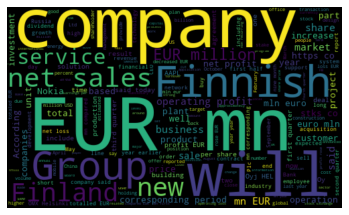

In [76]:

 #visualizacion de la nube de palabras
import matplotlib.pyplot as plt
allWords = ''.join([twts for twts in df['Sentence']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis ('off')
plt.show()

In [62]:
 # Cree una función para calcular el análisis negativo (-1), neutral (0) y positivo (+1)
def getAnalysis (score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
#mostrar el dataFrame
df

,Sentence,Sentiment,cleanTxt,Subjectivity,Polarity,Analysis
0,The GeoSolutions technology will leverage Bene...,positive,The GeoSolutions technology will leverage Bene...,0.588636,0.209091,Positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0.294444,0.022222,Positive
2,"For the last quarter of 2010 , Componenta 's n...",positive,"For the last quarter of 2010 , Componenta 's n...",0.172917,0.000000,Neutral
3,According to the Finnish-Russian Chamber of Co...,neutral,According to the Finnish-Russian Chamber of Co...,0.500000,0.062500,Positive
4,The Swedish buyout firm has sold its remaining...,neutral,The Swedish buyout firm has sold its remaining...,0.233333,-0.100000,Negative
...,...,...,...,...,...,...
5837,RISING costs have forced packaging producer Hu...,negative,RISING costs have forced packaging producer Hu...,0.200000,-0.300000,Negative
5838,Nordic Walking was first used as a summer trai...,neutral,Nordic Walking was first used as a summer trai...,0.333333,0.250000,Positive
5839,"According shipping company Viking Line , the E...",neutral,"According shipping company Viking Line , the E...",0.437500,0.187500,Positive
5840,"In the building and home improvement trade , s...",neutral,"In the building and home improvement trade , s...",0.700000,-0.400000,Negative


In [63]:
 #imprimiendo tweets positivos
print('imprimiendo tweets positivos: \n')
j=1
sortedDF = df.sort_values (by=['Polarity']) # ordenar tweets
for i in range(0, sortedDF.shape [0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) +')'+ sortedDF[ 'Sentence'][1])
    print()
  j=j+1

imprimiendo tweets positivos: 

1)$ESI on lows, down $1.50 to $2.50 BK a real possibility

2)$ESI on lows, down $1.50 to $2.50 BK a real possibility

4)$ESI on lows, down $1.50 to $2.50 BK a real possibility

8)$ESI on lows, down $1.50 to $2.50 BK a real possibility

9)$ESI on lows, down $1.50 to $2.50 BK a real possibility

12)$ESI on lows, down $1.50 to $2.50 BK a real possibility

15)$ESI on lows, down $1.50 to $2.50 BK a real possibility

22)$ESI on lows, down $1.50 to $2.50 BK a real possibility

23)$ESI on lows, down $1.50 to $2.50 BK a real possibility

29)$ESI on lows, down $1.50 to $2.50 BK a real possibility

30)$ESI on lows, down $1.50 to $2.50 BK a real possibility

33)$ESI on lows, down $1.50 to $2.50 BK a real possibility

35)$ESI on lows, down $1.50 to $2.50 BK a real possibility

41)$ESI on lows, down $1.50 to $2.50 BK a real possibility

54)$ESI on lows, down $1.50 to $2.50 BK a real possibility

55)$ESI on lows, down $1.50 to $2.50 BK a real possibility

56)$ESI on lo

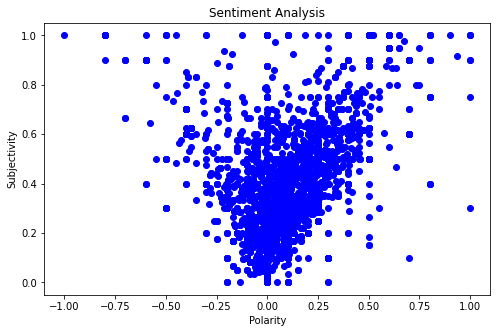

In [64]:
 #Plotting
plt.figure(figsize=(8,5))
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df ["Subjectivity"][i], color='Blue')
#plt.scatter(x,y,color)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [65]:
 #imprimiendo el porcentaje de tweets positivos
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Sentence']
ptweets
round( (ptweets.shape [0] / df.shape [0]) * 100, 1)

30.9

In [66]:
 #imprimiendo el porcentaje de tweets negativos
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Sentence']
ntweets
round (ntweets.shape [0] / df.shape [0] * 100, 1)


18.1

In [67]:
 #mostrar el recuento de valores
df['Analysis'].value_counts()

Neutral     2980
Positive    1807
Negative    1055
Name: Analysis, dtype: int64

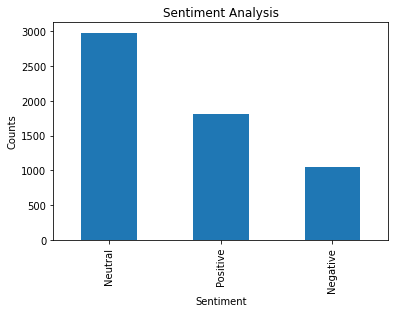

In [68]:
 #visualizar el conteo
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()
